In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
#from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from pandas.api.types import CategoricalDtype


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split

from keras import callbacks

from numpy.random import seed
from keras.layers import Input,Dropout,LSTM,TimeDistributed,RepeatVector,Dense
from keras.models import Model,load_model
from keras import regularizers

In [3]:
# from google.colab import drive
# drive.mount('/content/gdrive',force_remount=True)
# drive.mount('/content/drive')

MessageError: ignored

In [3]:
data = pd.read_csv('Copy of master_3lakh.csv')

In [4]:
data.isnull().sum()

Unnamed: 0         0
date               0
user               0
L1                63
L2                63
L3                63
L4                63
L5                63
L6                63
L7                63
L8                63
L9                63
D1            256899
D2            256899
H1               645
E1              2652
E2              2652
E3              2652
E4              2652
E5              2652
F1            233093
label              0
dtype: int64

In [5]:
data.drop(columns=['Unnamed: 0','D1','D2','F1'],axis=1,inplace=True)

In [6]:
data.isnull().sum()

date        0
user        0
L1         63
L2         63
L3         63
L4         63
L5         63
L6         63
L7         63
L8         63
L9         63
H1        645
E1       2652
E2       2652
E3       2652
E4       2652
E5       2652
label       0
dtype: int64

In [7]:
data = data.fillna(0)

In [8]:
data.isnull().sum()

date     0
user     0
L1       0
L2       0
L3       0
L4       0
L5       0
L6       0
L7       0
L8       0
L9       0
H1       0
E1       0
E2       0
E3       0
E4       0
E5       0
label    0
dtype: int64

In [9]:
# Add column for year
data["Year"] = pd.to_datetime(data["date"], format="%Y-%m-%d").dt.year

# Add column for day
data["Day"] = pd.to_datetime(data["date"], format="%Y-%m-%d").dt.day

data["month"] = pd.to_datetime(data["date"], format="%Y-%m-%d").dt.month

In [10]:
data.drop('date',axis=1,inplace=True)

In [11]:
data.head(2)

,user,L1,L2,L3,L4,L5,L6,L7,L8,L9,H1,E1,E2,E3,E4,E5,label,Year,Day,month
0,QWL3474,357.150000,150.00,0.333333,0.0,1.0,1.0,76.0,12.0,169.050000,83.0,13.0,29.0,4.0,3404386.0,42.0,0,2011,4,2
1,TJB0540,710.133333,382.35,0.000000,0.0,0.0,0.0,85.0,0.0,218.496667,12.0,7.0,15.0,12.0,9018108.0,22.0,0,2011,1,2


In [12]:
data.drop('user',axis=1,inplace=True)

In [13]:
data['label'].value_counts()

0    300000
1        78
Name: label, dtype: int64

In [14]:
data.columns

Index(['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'H1', 'E1', 'E2',
       'E3', 'E4', 'E5', 'label', 'Year', 'Day', 'month'],
      dtype='object')

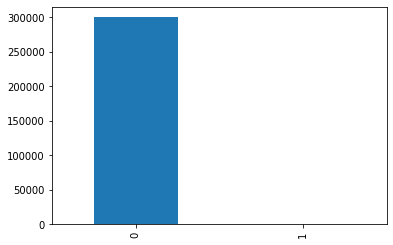

In [15]:
pd.value_counts(data['label']).plot.bar()

In [16]:
from sklearn.preprocessing import MinMaxScaler
data[['Year', 'Day','month']] = MinMaxScaler().fit_transform(data[['Year', 'Day','month']])

In [17]:


x = data.drop('label', axis=1).values
y = data.label.values

In [18]:
#train-test split
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split( x, y, test_size=0.20, random_state=0)

In [19]:
(y_test==0).sum(),(y_test==1).sum(),(y_train==1).sum()

(59997, 19, 59)

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(x, y)

In [21]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_sm, y_sm, test_size=0.20, random_state=0)
X_train1.shape,X_test1.shape,y_train1.shape,y_test1.shape

((480000, 18), (120000, 18), (480000,), (120000,))

In [22]:
(y_test1==0).sum(),(y_test1==1).sum()

(59856, 60144)

In [50]:
!pip install tabgan

     |████████████████████████████████| 45 kB 2.1 MB/s 
     |████████████████████████████████| 6.8 MB 9.0 MB/s 
     |████████████████████████████████| 86 kB 5.8 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.2 which is incompatible.


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics


In [37]:
data.columns

Index(['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'H1', 'E1', 'E2',
       'E3', 'E4', 'E5', 'label', 'Year', 'Day', 'month'],
      dtype='object')

In [38]:
COLS_USED = ['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'H1', 'E1', 'E2',
       'E3', 'E4', 'E5', 'label', 'Year', 'Day', 'month']
COLS_TRAIN = ['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'H1', 'E1', 'E2',
       'E3', 'E4', 'E5', 'Year', 'Day', 'month']

In [39]:
df = data[COLS_USED]

In [40]:
# Split into training and test sets
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(
    df.drop("label", axis=1),
    df["label"],
    test_size=0.20,
    #shuffle=False,
    random_state=42,
)

In [41]:
df_x_test, df_y_test = df_x_test.reset_index(drop=True), \
  df_y_test.reset_index(drop=True)
df_y_train = pd.DataFrame(df_y_train)
df_y_test = pd.DataFrame(df_y_test)

In [42]:
# Pandas to Numpy
x_train = df_x_train.values
x_test = df_x_test.values
y_train = df_y_train.values
y_test = df_y_test.values

In [43]:
# Build the neural network
model = Sequential()
# Hidden 1
model.add(Dense(50, input_dim=x_train.shape[1], activation='relu')) 
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(12, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=5, verbose=1, mode='auto',
        restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
        callbacks=[monitor], verbose=2,epochs=2)

Epoch 1/2
7502/7502 - 33s - loss: 413412544.0000 - val_loss: 56686.2383 - 33s/epoch - 4ms/step
Epoch 2/2
7502/7502 - 25s - loss: 7752428.5000 - val_loss: 1423.9656 - 25s/epoch - 3ms/step


In [44]:
pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 37.73545767633114


In [65]:
CMD = "wget https://raw.githubusercontent.com/Diyago/"\
  "GAN-for-tabular-data/master/requirements.txt"

!{CMD}
!pip install -r requirements.txt
!pip install tabgan

--2022-04-22 04:17:29--  https://raw.githubusercontent.com/Diyago/GAN-for-tabular-data/master/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 197 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     197  --.-KB/s    in 0s      

2022-04-22 04:17:29 (10.2 MB/s) - ‘requirements.txt’ saved [197/197]

     |████████████████████████████████| 100 kB 4.0 MB/s 
     |████████████████████████████████| 20.1 MB 1.3 MB/s 
     |████████████████████████████████| 748.8 MB 18 kB/s 
     |████████████████████████████████| 9.9 MB 18.4 MB/s 
     |████████████████████████████████| 1.2 MB 44.7 MB/s 
     |████████████████████████████████| 227 kB 52.7 MB/s 
     |████████████████████████████████| 75 kB 4.5 MB/s 
     |█

In [ ]:
from tabgan.sampler import OriginalGenerator, GANGenerator
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

gen_x, gen_y = GANGenerator(gen_x_times=1.1, cat_cols=None,
           bot_filter_quantile=0.001, top_filter_quantile=0.999, \
              is_post_process=True,
           adversarial_model_params={
               "metrics": "rmse", "max_depth": 2, "max_bin": 100, 
               "learning_rate": 0.02, "random_state": \
                42, "n_estimators": 500,
           }, pregeneration_frac=2, only_generated_data=False,\
           gan_params = {"batch_size": 500, "patience": 25, \
          "epochs" : 500,}).generate_data_pipe(df_x_train, df_y_train,\
          df_x_test, deep_copy=True, only_adversarial=False, \
          use_adversarial=True)

Fitting CTGAN transformers for each column:   0%|          | 0/19 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
gen_x

In [ ]:
# Predict
pred = model.predict(gen_x.values)
score = np.sqrt(metrics.mean_squared_error(pred,gen_y.values))
print("Final score (RMSE): {}".format(score))